## Intermediate Data Science

#### University of Redlands - DATA 201
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data201.joannabieri.com](https://joannabieri.com/data201_intermediate.html)

In [3]:
# Some basic package imports
import os
import numpy as np
import pandas as pd

# Visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'
import seaborn as sns

# ML packages
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


---------------
## Introductoin to Machine Learning - Day12 HW

Your job is to play around with K-nearest neighbors!

### Part 1 - build a model

1. Get the Avocado Ripeness data from [https://www.kaggle.com/datasets/amldvvs/avocado-ripeness-classification-dataset](https://www.kaggle.com/datasets/amldvvs/avocado-ripeness-classification-dataset)
2. Discuss the data - who owns it, what is the license, what are the features (variables)?
3. Do some basic analysis: describe for numerical data, value_counts for categorical data and pairplot for a visualization.
    * Write about your observations of the data. Include things like: NaNs, Outliers, Balance in categories.
    * What do you learn from looking at the pairplot colored by (hue='ripeness' vs hue='color_category'). Do some of the features seem like they are good predictors for classifying color or ripeness? Does it seam reasonable that you can classify ripeness or color based on the other variables? Does it seem easier to classify ripeness or color?
4. Do a Train-Test split on the data.
5. Using all of the numerical features as your data columns  and train a KNN model. You choose number of neighbors!
6. Test your model accuracy using the test set. How did you do? For me this resulted in 92% accuracy - if I used 1 neighbor)


### Part 2 - play around with the model - aka tune.

Even though we don't have a validation set, lets use the test set to try to tune the model. This means changing things to see if you can make your model better or worse. Here are some ideas:
* How many neighbors gives you the best results? Does it always help to increase the number of neighbors? Try plotting the number of neighbors vs accuracy for a bunch of tests. I did this in a for loop: training the model and saving the accuracy for 1, 2, 3, ... 20 neighbors.
* Test how many features (variables) you actually need to get a good prediction. Try a few of the ones that seem really good based on the pair plot. What is the minimum number of features you can use to get really good accuracy?

Please write up your conclusions.

Your final notebooks should:

- [ ] Be a completely new notebook with just the Day12 stuff in it NO YOU TRY: Read in the data, make the plots. Make sure to discuss what you see and comment on why your plots are great!
- [ ] Be reproducible with junk code removed.
- [ ] Have lots of language describing what you are doing, especially for questions you are asking or things that you find interesting about the data. Use complete sentences, nice headings, and good markdown formatting: https://www.markdownguide.org/cheat-sheet/
- [ ] It should run without errors from start to finish.

**Remember to Proof Read and Proof Run your code** Restart the kernel and go through it all once before submitting.

# 2. Who owns the data 
This data set is owned by Amal Dev. It is a data set that is used to stimulate various measuremeants on Avacados that are designed to predict Avacado ripeness stages using physical characteristics.

It was accessed 6 months ago in April. 

The license that this data set falls under is the Apache 2.0

The variables that the data set contains are numerical and categorical. These are firmness, hue, Saturation, brightness, color category, sound db, weight_g, size_cm3

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("amldvvs/avocado-ripeness-classification-dataset")

print("Path to dataset files:", path)

file = path + '/' + os.listdir(path)[0]
df = pd.read_csv(file)
df

/Users/sethchairez/anaconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



Path to dataset files: /Users/sethchairez/.cache/kagglehub/datasets/amldvvs/avocado-ripeness-classification-dataset/versions/1


,firmness,hue,saturation,brightness,color_category,sound_db,weight_g,size_cm3,ripeness
0,14.5,19,40,26,black,34,175,261,ripe
1,71.7,53,69,75,green,69,206,185,pre-conditioned
2,88.5,60,94,46,dark green,79,220,143,hard
3,93.8,105,87,41,dark green,75,299,140,hard
4,42.5,303,58,32,purple,63,200,227,breaking
...,...,...,...,...,...,...,...,...,...
245,94.1,83,80,58,dark green,72,254,134,hard
246,21.6,17,36,19,black,47,182,240,firm-ripe
247,14.0,4,40,17,black,37,188,274,ripe
248,61.5,63,87,75,green,65,261,162,pre-conditioned


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   firmness        250 non-null    float64
 1   hue             250 non-null    int64  
 2   saturation      250 non-null    int64  
 3   brightness      250 non-null    int64  
 4   color_category  250 non-null    object 
 5   sound_db        250 non-null    int64  
 6   weight_g        250 non-null    int64  
 7   size_cm3        250 non-null    int64  
 8   ripeness        250 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 17.7+ KB


In [11]:
df.describe()

,firmness,hue,saturation,brightness,sound_db,weight_g,size_cm3
count,250.000000,250.00000,250.000000,250.00000,250.000000,250.000000,250.000000
mean,50.618400,125.94400,64.356000,45.07200,58.016000,220.188000,208.644000
std,27.277678,117.13767,17.377144,19.11629,13.838126,34.405225,55.940564
min,10.300000,1.00000,30.000000,10.00000,30.000000,152.000000,100.000000
25%,25.750000,25.25000,51.250000,31.00000,47.250000,193.250000,155.250000
50%,48.950000,77.00000,65.000000,46.00000,60.000000,220.000000,218.000000
75%,74.050000,278.75000,76.750000,58.00000,68.000000,245.000000,260.500000
max,98.800000,329.00000,99.000000,78.00000,79.000000,299.000000,299.000000


In [13]:
df.keys()

Index(['firmness', 'hue', 'saturation', 'brightness', 'color_category',
       'sound_db', 'weight_g', 'size_cm3', 'ripeness'],
      dtype='object')

# 3. Do some basic analysis: describe for numerical data, value_counts for categorical data and pairplot for a visualization. 
    * Write about your observations of the data. Include things like: NaNs, Outliers, Balance in categories.
    * What do you learn from looking at the pairplot colored by (hue='ripeness' vs hue='color_category'). Do some of the features seem like they are good predictors for classifying color or ripeness? Does it seam reasonable that you can classify ripeness or color based on the other variables? Does it seem easier to classify ripeness or color?

In [15]:
df.isnull().sum() 

firmness          0
hue               0
saturation        0
brightness        0
color_category    0
sound_db          0
weight_g          0
size_cm3          0
ripeness          0
dtype: int64

There appears to be no nulls within this data. This is good for data analysis because this means that we are working with a very clean data set 

In [17]:
df.value_counts()

firmness  hue  saturation  brightness  color_category  sound_db  weight_g  size_cm3  ripeness
98.8      91   76          59          dark green      73        259       138       hard        1
10.3      1    54          35          black           34        152       265       ripe        1
91.8      83   74          42          dark green      74        254       100       hard        1
92.1      89   74          62          dark green      76        234       142       hard        1
92.7      64   89          41          dark green      79        230       147       hard        1
                                                                                                ..
10.8      3    43          14          black           40        205       262       ripe        1
          24   34          20          black           40        187       267       ripe        1
10.9      14   59          14          black           33        217       279       ripe        1
11.6      15   

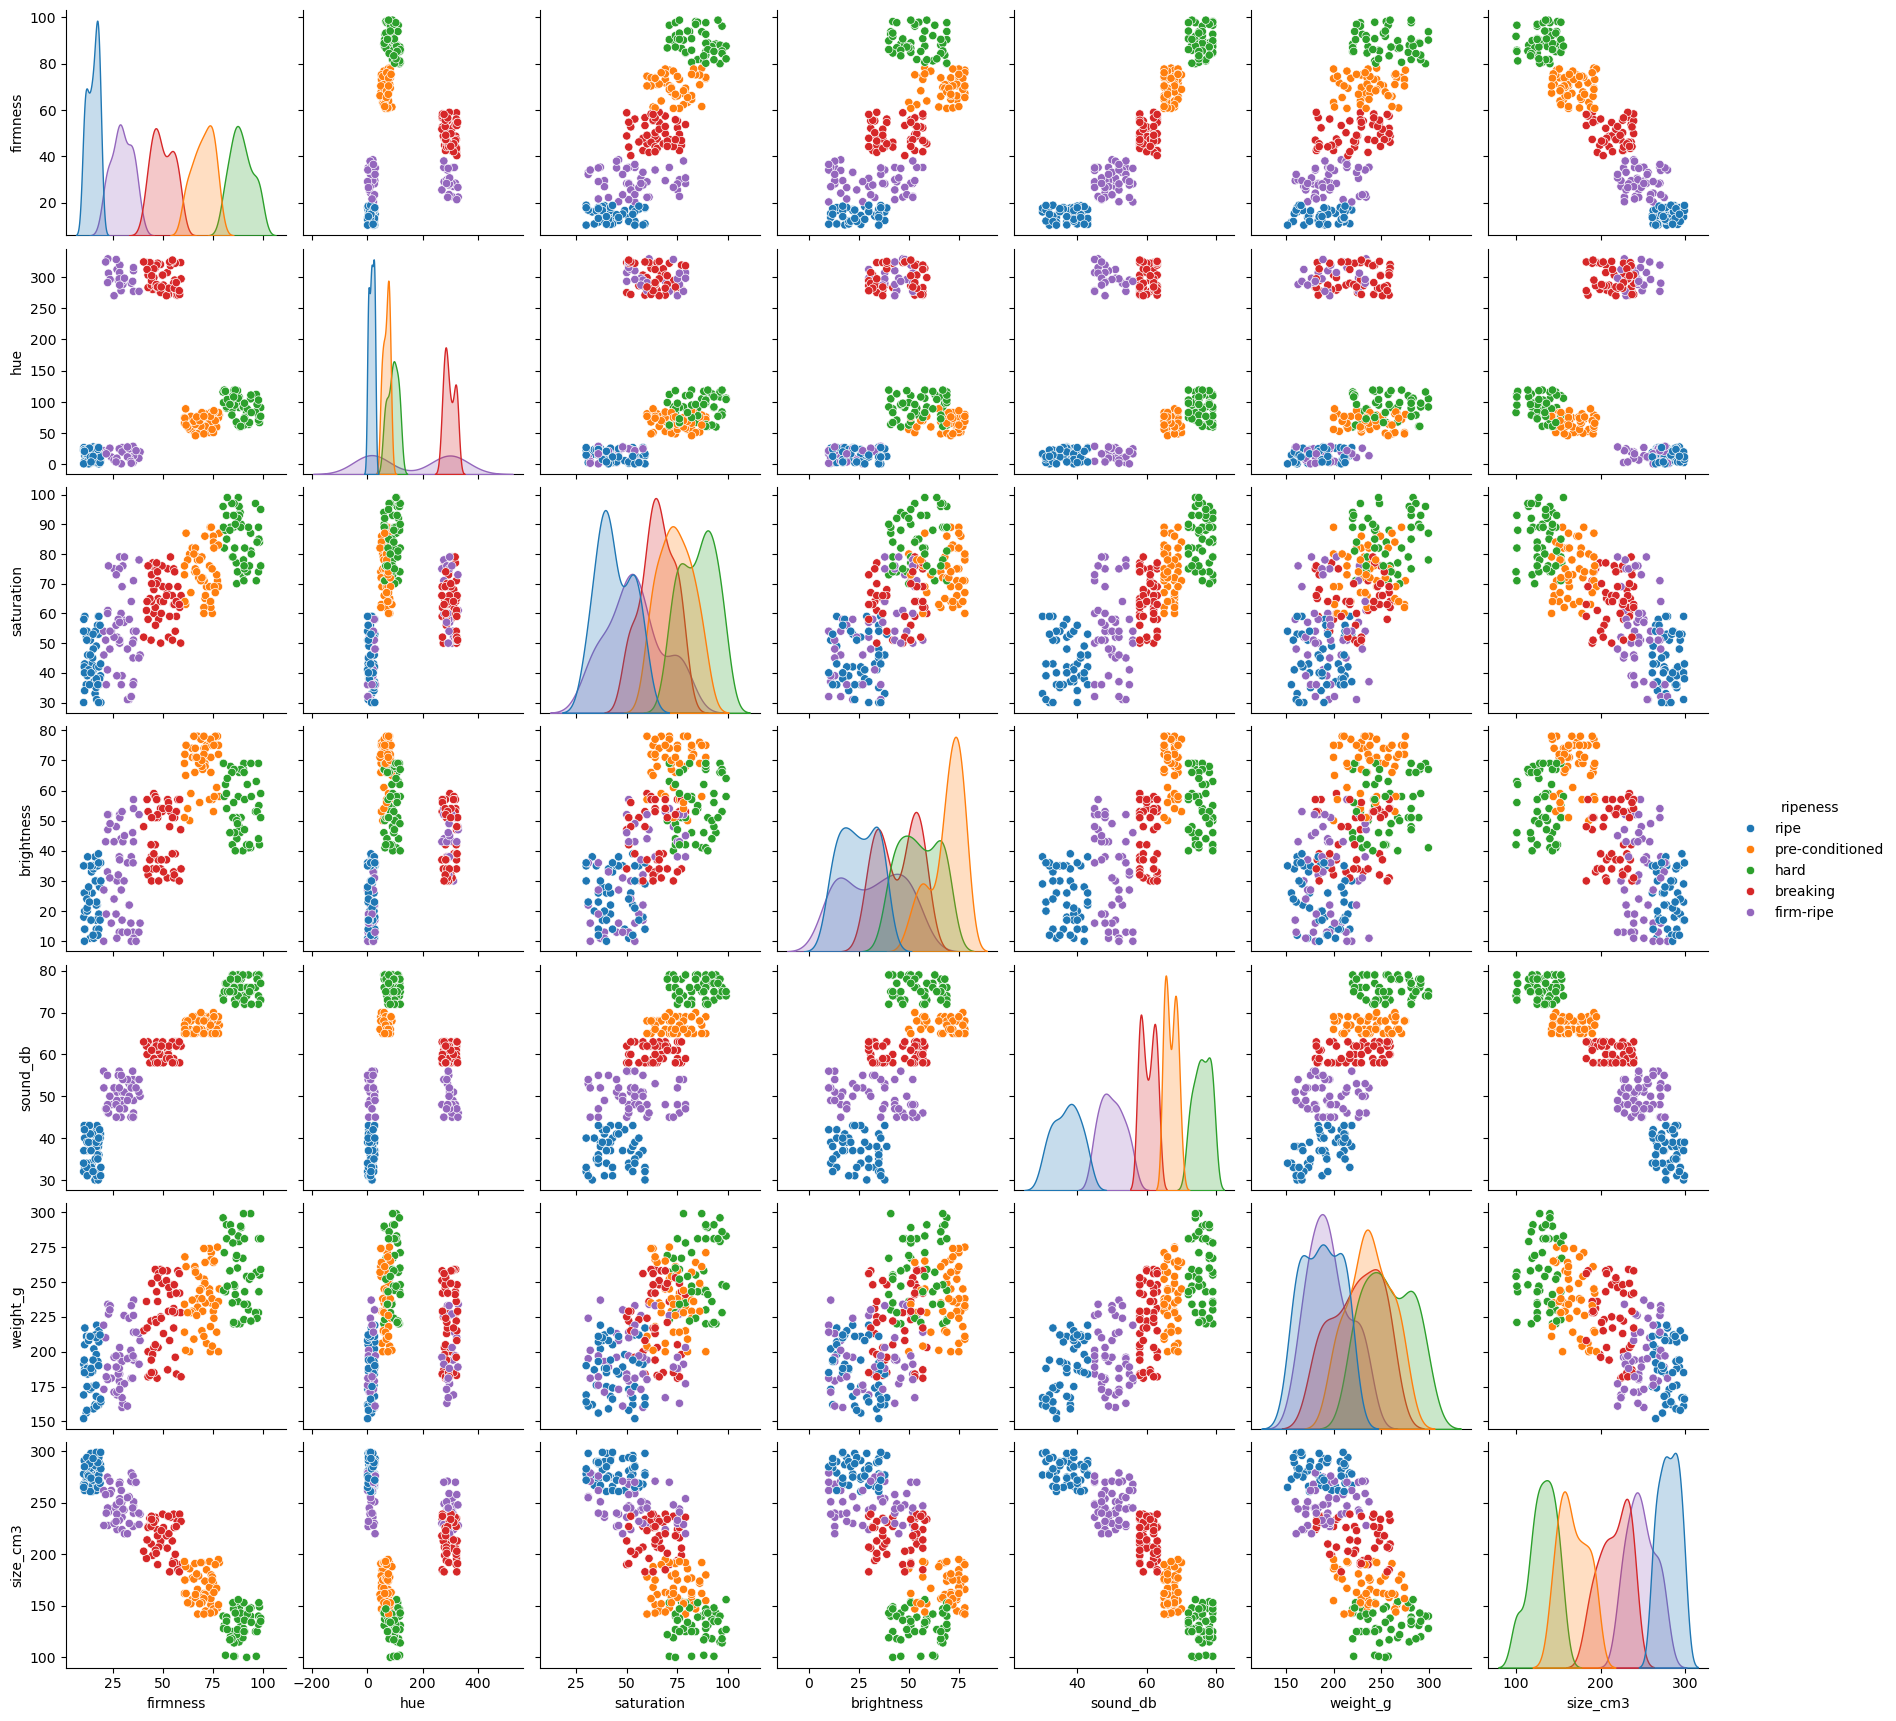

In [19]:
sns.pairplot(df,hue = 'ripeness')          

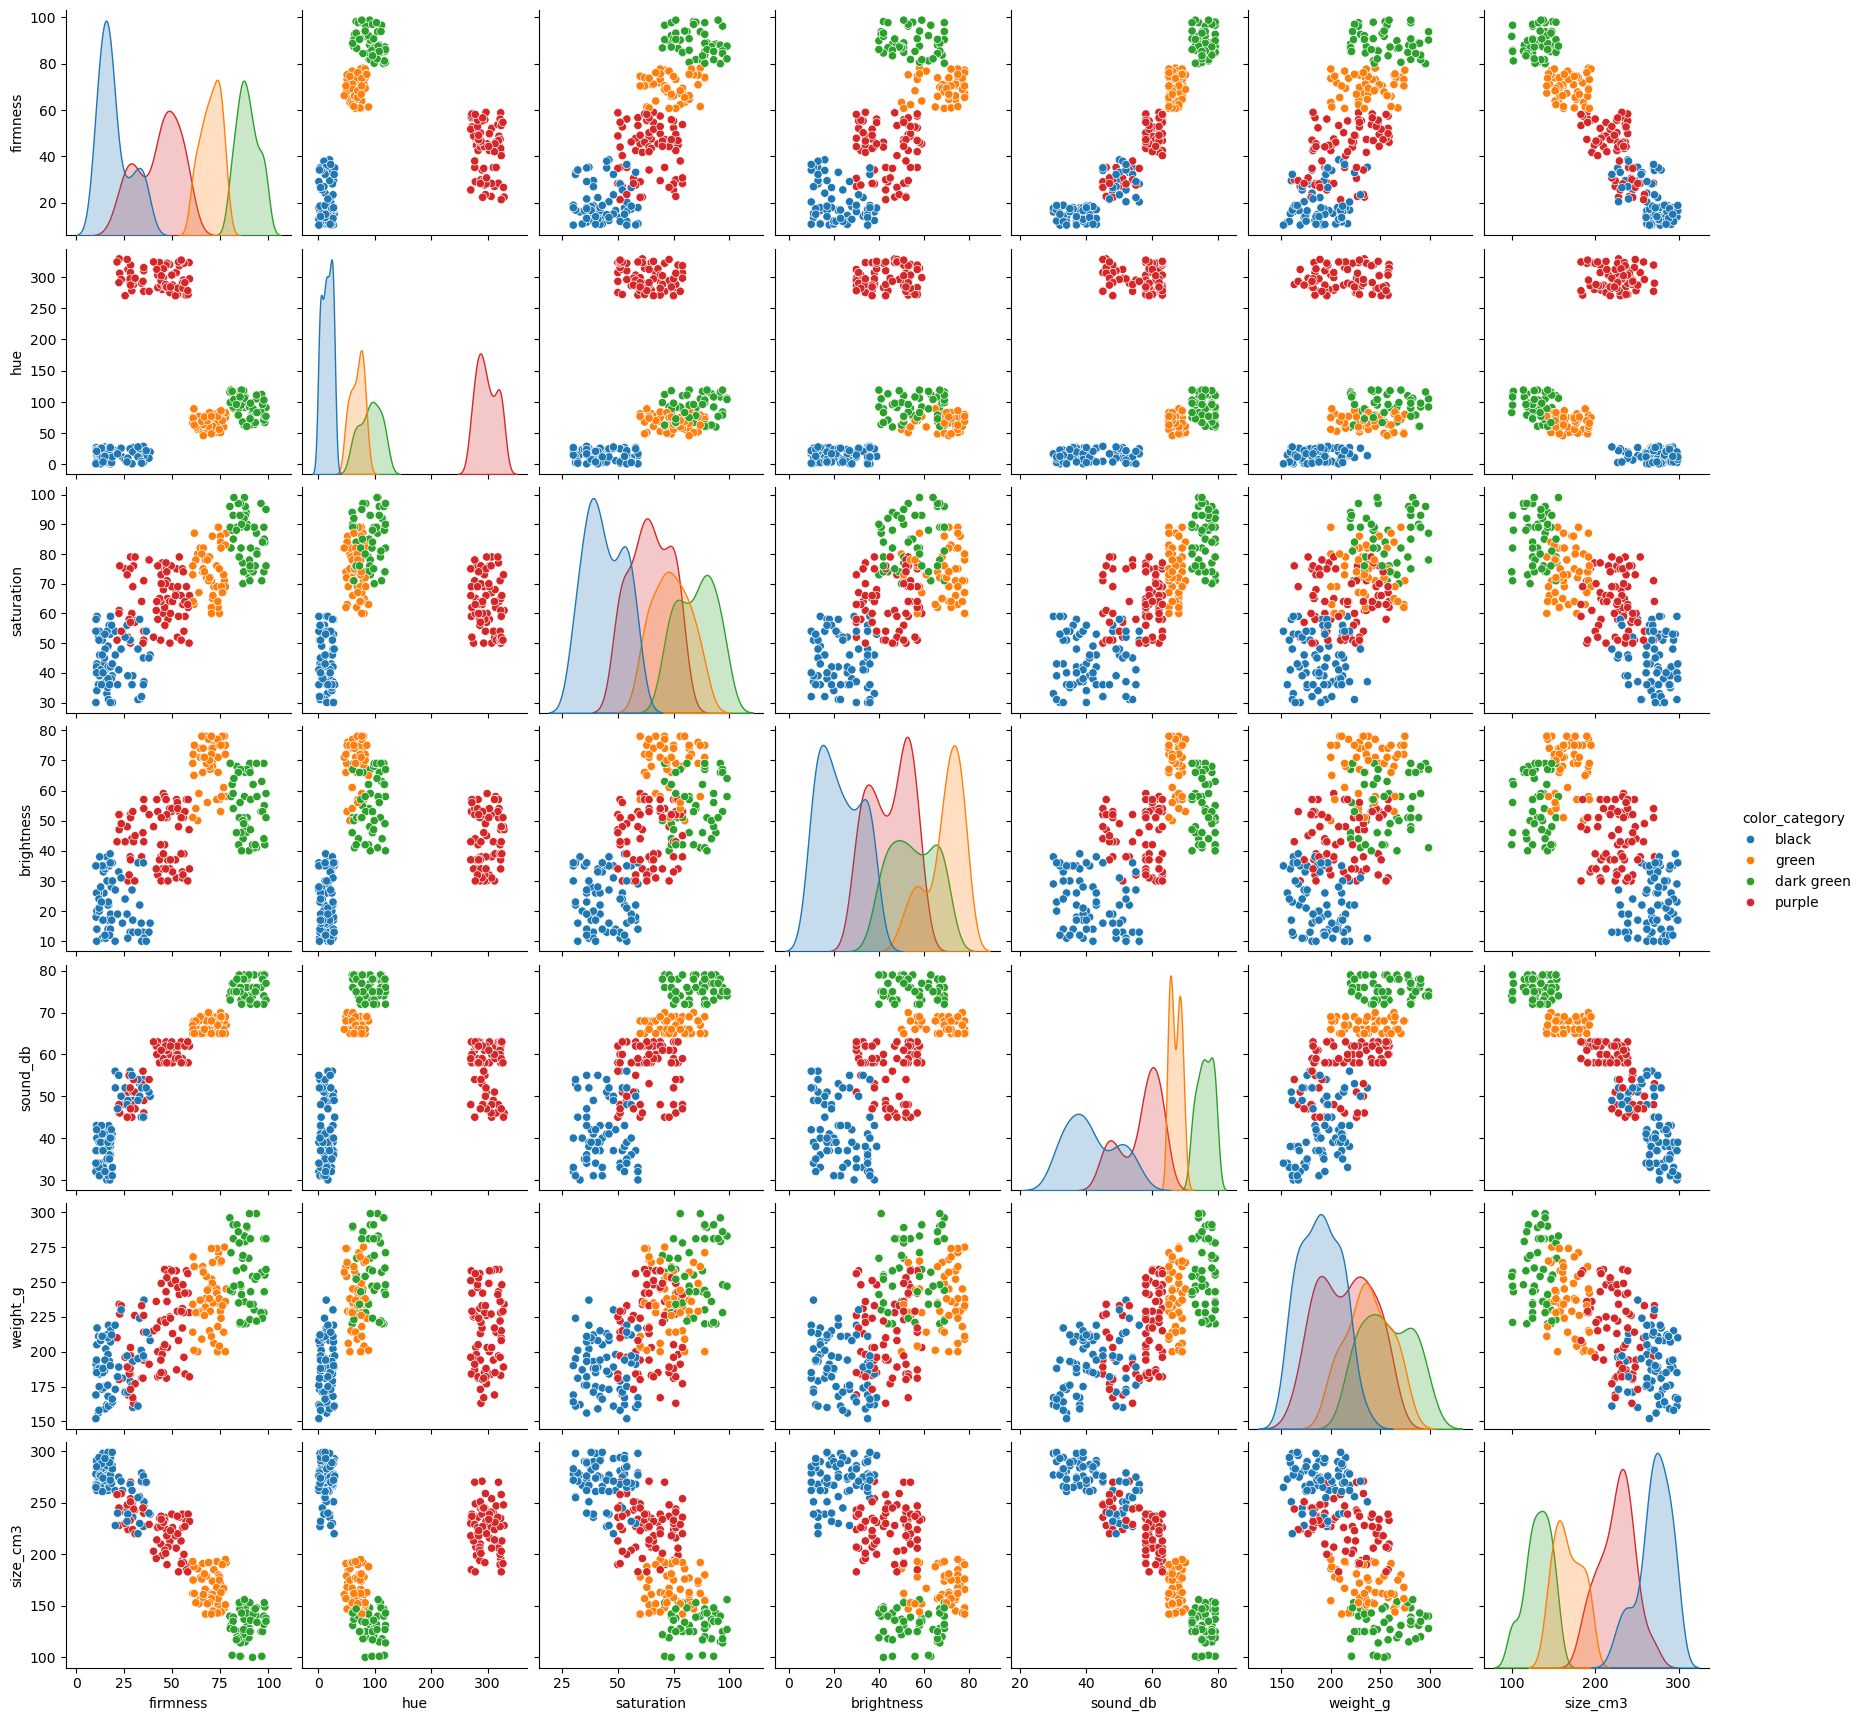

In [20]:
sns.pairplot(df,hue = 'color_category')

In both the ripeness and color graphs, we can see strong correlation between the size in centimeters compared to firmness, saturation, and sound. In addition to this, there is strong correlation between the sound and firmness, as well as the firmness compared to the size in centimeres cubed. These graphs inform that features are good predictors for both ripeness and color. Ripeness is easier to classify however but both give well structued data that can be defined.

In [21]:
df.keys()

Index(['firmness', 'hue', 'saturation', 'brightness', 'color_category',
       'sound_db', 'weight_g', 'size_cm3', 'ripeness'],
      dtype='object')

# 4.  Do a Train-Test split on the data.


In [22]:
cols = ['firmness', 'hue', 'saturation', 'brightness',
       'sound_db', 'weight_g', 'size_cm3']
X = df[cols].copy()
y = df['ripeness'].copy()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2, random_state = 67)

# 5. Using all of the numerical features as your data columns  and train a KNN model. You choose number of neighbors!

These are the various results of accuracy scores between the different number of neighbors: 
1: .96
2. .98
3. .94
4. .96
5. .96
6. .96
7. .96
8 .94
9. .96 
10.94
11. .92
12. .96

In [25]:
knn = KNeighborsClassifier(n_neighbors = 2)

In [26]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [33]:
xt = X_test.iloc[:2]
xt

,firmness,hue,saturation,brightness,sound_db,weight_g,size_cm3
246,21.6,17,36,19,47,182,240
149,16.8,3,31,23,31,161,298


In [35]:
yt = y_test.iloc[0]
yt

'firm-ripe'

In [37]:
knn.predict(xt)

array(['firm-ripe', 'ripe'], dtype=object)

# 6. Test your model accuracy using the test set. How did you do? For me this resulted in 92% accuracy - if I used 1 neighbor)


In [39]:
knn.score(X_test, y_test)

0.98

Based on a value of 3 neighbors, accuracy went up from 92% to 94% 

In [41]:
y_pred = knn.predict(X_test)

In [43]:
mask = y_pred != y_test
X_test[mask]

,firmness,hue,saturation,brightness,sound_db,weight_g,size_cm3
215,23.4,26,48,31,50,230,271


In [45]:
y_test[mask]

215    firm-ripe
Name: ripeness, dtype: object

# * How many neighbors gives you the best results? Does it always help to increase the number of neighbors? Try plotting the number of neighbors vs accuracy for a bunch of tests. I did this in a for loop: training the model and saving the accuracy for 1, 2, 3, ... 20 neighbors.

In [47]:
neighbors =  list(range(1,21))#[1,2,3,4,5,6,7,8,9]
acc_score = []

In [49]:
for n in neighbors: 
    knn = KNeighborsClassifier(n_neighbors= n) 
    knn.fit(X_train,y_train)
    acc_score.append(knn.score(X_test,y_test))

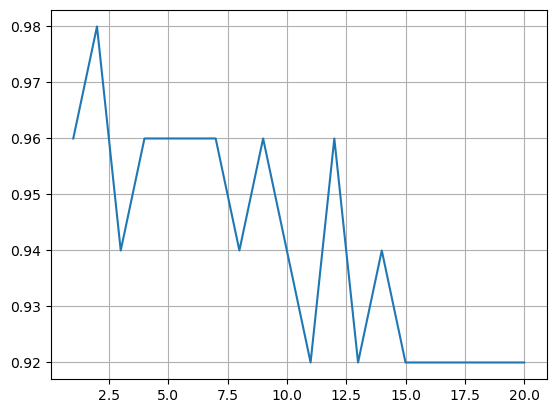

In [51]:
plt.plot(neighbors,acc_score)
plt.grid()
plt.show()

Baed on this graph, we can see that increasing the number of neighbors does not necessarily increase the accurary of the graph.
The accuracy is stronger for 1,2,4. 1 being .96, 2 being .98, and 4 being .96. From the values of 10-20 we can see a decrease in the accuracy. 14 begins the lowest accuracy score of .94, following 15 at around .92 and this continue throughout 20. We can overall conclude that a smaller amount of neighbors is going to result in the best accuracy for the graph. 

# * Test how many features (variables) you actually need to get a good prediction. Try a few of the ones that seem really good based on the pair plot. What is the minimum number of features you can use to get really good accuracy?


#This is the original data 
cols = ['firmness', 'hue', 'saturation', 'brightness',
       'sound_db', 'weight_g', 'size_cm3']
X = df[cols].copy()
y = df['ripeness'].copy()

In [239]:
cols = ['firmness','sound_db', 'weight_g', 'size_cm3']
X = df[cols].copy()
y = df['ripeness'].copy()

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2, random_state = 67)

If we eliminate the variables hue and saturation, we are still able to get a good pair plot. Instead of the accuracy 

In [212]:
knn = KNeighborsClassifier(n_neighbors = 2)

In [214]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [216]:
xt = X_test.iloc[:2]
xte

,firmness,sound_db,weight_g,size_cm3
246,21.6,47,182,240
149,16.8,31,161,298


In [218]:
yt = y_test.iloc[0]
yt

'firm-ripe'

In [220]:
knn.predict(xt)

array(['firm-ripe', 'ripe'], dtype=object)

In [222]:
knn.score(X_test, y_test)

0.98

In [224]:
y_pred = knn.predict(X_test)

In [226]:
mask = y_pred != y_test
X_test[mask]

,firmness,sound_db,weight_g,size_cm3
81,65.9,69,261,191


In [228]:
y_test[mask]

81    pre-conditioned
Name: ripeness, dtype: object

In [230]:
neighbors =  list(range(1,21))#[1,2,3,4,5,6,7,8,9]
acc_score = []

In [232]:
for n in neighbors: 
    knn = KNeighborsClassifier(n_neighbors= n) 
    knn.fit(X_train,y_train)
    acc_score.append(knn.score(X_test,y_test))

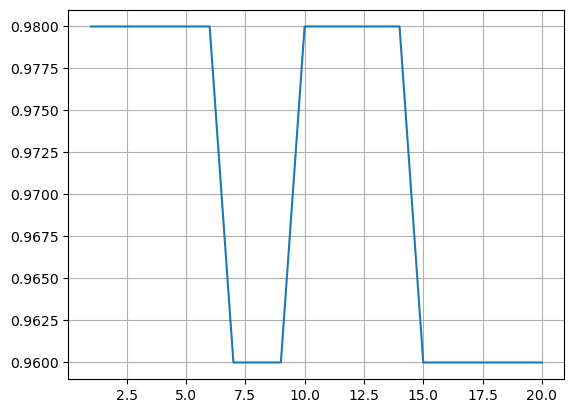

In [234]:
plt.plot(neighbors,acc_score)
plt.grid()
plt.show()

We are able to eliminate 3 of the variables before results start to plummet drastically. Within this graph, I eliminated the variables hue, Saturation, brightness, and resulted were interesting. We can see see that neighbors 1-6 held an accuracy of .98 and plummet at 7. At 7 they only drop to an accuracy of .96. After this through 14, accuracy goes back up to the value of .98 accuracy. Although many of the variables are eliminated we are able to see a consistency throughout the accuracy as they remain high. It can also show us that many of the variables act as fluff and can affect the accuracy of the graph. 